In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [334]:
df = pd.read_csv('df.csv')
print(df.shape)
df.head()

(695542, 8)


,twt_id,date,full_text,usr_name,usr_id,lang,location,description
0,1423428941839314949,2021-08-05 23:41:20,RT @cruzsevandro: o skate é a o esporte com pe...,yaslovisk,930604163091886080,pt,No seu coração bebê,"𝗢𝗿𝗮, 𝗾𝘂𝗲𝗿𝗶𝗱𝗼. 𝗦𝗲 𝗻ã𝗼 𝗮𝗴𝘂𝗲𝗻𝘁𝗮 𝗼 𝗰𝗮𝗹𝗼𝗿, 𝘀𝗮𝗶𝗮 𝗱𝗼 ..."
1,1423428934117601283,2021-08-05 23:41:18,RT @cruzsevandro: o skate é a o esporte com pe...,QuartzFumes,1168478932213096449,pt,ela/dela,cαdєlínhα dσ mαmαmσσ /\n мiуαиє /\n/вуυℓ υттє...
2,1423428931068305408,2021-08-05 23:41:17,RT @GQBrasil: . @LeticiaBufoni queremos ver o ...,gavassiBH,1263976762146459649,pt,Brazil,"↠ 𝘔𝘰𝘢𝘳𝘮𝘺, 𝘎𝘢𝘷𝘢𝘴𝘴𝘪𝘦𝘳 𝘦 𝘋𝘰𝘳𝘢𝘮𝘦𝘪𝘳𝘢 💜\nFan account ❀"
3,1423428930602733572,2021-08-05 23:41:17,RT @cruzsevandro: o skate é a o esporte com pe...,princpark,601475583,pt,Brasil,a full flower moment 🌼
4,1423428925582102529,2021-08-05 23:41:16,RT @SOLELINKS: Ad: RESTOCK👌\nNike SB Zoom Blaz...,Vo_Vision,109582509,en,Chicago Over Everything,@musicbreakr\nMusicbreakr is n a16z/TxO backed...


<AxesSubplot:xlabel='date_only'>

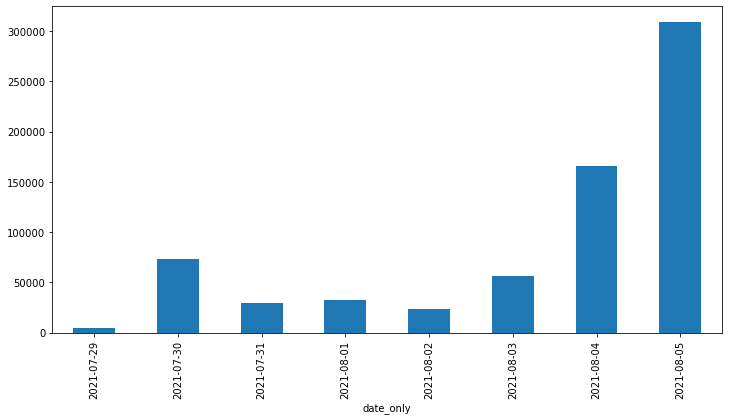

In [335]:
df['date_only'] = pd.to_datetime(df['date'], format='%Y/%m/%d %H:%M:%S').dt.date
df.groupby('date_only').twt_id.count().plot.bar(figsize=(12, 6))

##### 4 august was the women skate park phase, and 5 august was the men skate park phase explaining the big increase in tweets mentioning 'skate'
We can filter only on those two days

In [336]:
df = df.loc[df.date_only.apply(lambda x: str(x) in ['2021-08-04','2021-08-05'])]
df

,twt_id,date,full_text,usr_name,usr_id,lang,location,description,date_only
0,1423428941839314949,2021-08-05 23:41:20,RT @cruzsevandro: o skate é a o esporte com pe...,yaslovisk,930604163091886080,pt,No seu coração bebê,"𝗢𝗿𝗮, 𝗾𝘂𝗲𝗿𝗶𝗱𝗼. 𝗦𝗲 𝗻ã𝗼 𝗮𝗴𝘂𝗲𝗻𝘁𝗮 𝗼 𝗰𝗮𝗹𝗼𝗿, 𝘀𝗮𝗶𝗮 𝗱𝗼 ...",2021-08-05
1,1423428934117601283,2021-08-05 23:41:18,RT @cruzsevandro: o skate é a o esporte com pe...,QuartzFumes,1168478932213096449,pt,ela/dela,cαdєlínhα dσ mαmαmσσ /\n мiуαиє /\n/вуυℓ υттє...,2021-08-05
2,1423428931068305408,2021-08-05 23:41:17,RT @GQBrasil: . @LeticiaBufoni queremos ver o ...,gavassiBH,1263976762146459649,pt,Brazil,"↠ 𝘔𝘰𝘢𝘳𝘮𝘺, 𝘎𝘢𝘷𝘢𝘴𝘴𝘪𝘦𝘳 𝘦 𝘋𝘰𝘳𝘢𝘮𝘦𝘪𝘳𝘢 💜\nFan account ❀",2021-08-05
3,1423428930602733572,2021-08-05 23:41:17,RT @cruzsevandro: o skate é a o esporte com pe...,princpark,601475583,pt,Brasil,a full flower moment 🌼,2021-08-05
4,1423428925582102529,2021-08-05 23:41:16,RT @SOLELINKS: Ad: RESTOCK👌\nNike SB Zoom Blaz...,Vo_Vision,109582509,en,Chicago Over Everything,@musicbreakr\nMusicbreakr is n a16z/TxO backed...,2021-08-05
...,...,...,...,...,...,...,...,...,...
474458,1422708864408072195,2021-08-04 00:00:00,quero ver o negócio do skate,godsarianw,1202687403149996032,pt,NaN,not zendaya but her bestie,2021-08-04
474459,1422708864374423552,2021-08-04 00:00:00,RT @nahfreitas42: Todos prontos para xingarmos...,luygovaz,71711255,pt,Teresina Pi,.......,2021-08-04
474460,1422708864366043139,2021-08-04 00:00:00,meu deus a isa forneck ta competindo no skate ...,majufrazatto,879003580539207680,pt,Trost District | she/him,personalidade: reclamar de exatas,2021-08-04
474461,1422708863439155201,2021-08-04 00:00:00,We're ready for this upcoming hockey season; A...,SinBin_Sports,310075276,en,"Strathcona County, Alberta",Your local sports specialists located in the h...,2021-08-04


In [337]:
df_no_rt = df.loc[~df['full_text'].str.contains("RT @")]
print(df_no_rt.shape)

(237554, 9)


In [338]:
freq_df = df_no_rt.groupby('lang')['lang'].count().reset_index(name="count").sort_values(by='count', ascending=False)
freq_df.head(5)

,lang,count
28,pt,213127
8,en,10359
9,es,6197
14,fr,1397
21,ja,1091


##### The top 10 languages most used talking about skate board on the skate olympic games period. Portugese is largely ahead

## French reactions analysis
Filtering only french tweets

In [339]:
df_fr = df_no_rt[df_no_rt.lang == 'fr']
df_fr.reset_index(inplace=True)
df_fr.head()

,index,twt_id,date,full_text,usr_name,usr_id,lang,location,description,date_only
0,232,1423427324524089344,2021-08-05 23:34:54,N’essayez pas le skate en pleine rue en étant ...,didine1eredunom,2968497256,fr,Belgique,BLM | she/her | 🌈 | 22,2021-08-05
1,330,1423426708623998981,2021-08-05 23:32:27,@yykeste tu fais du skate ?,hbmeyy,1255657839831498752,fr,NaN,الله,2021-08-05
2,482,1423425754780651529,2021-08-05 23:28:40,@djangophett @jvlmus IRL je le croise et je le...,ZASSIO1,1048882354390020096,fr,Bah chez moi frère,On est là hein \n\n\n🧐,2021-08-05
3,800,1423423842245124098,2021-08-05 23:21:04,@Bruxellois_2 @Safvyaa Ptdrr tg toi t’es une r...,LyaTaReus,1412099692066967553,fr,Ta voisine (Bxl/Casa),🇲🇦,2021-08-05
4,892,1423423225103622146,2021-08-05 23:18:37,J'ai fait du skate dans tout dole jsuis contente,TropDeSel,1172728018575462400,fr,route de tt les périls,Lilac Straw ♍she/her / pan&ace / INTP 9w1 / 19...,2021-08-05


In [340]:
for twt in df_fr.sample(10).full_text.tolist():
    print(twt + '\n')

@Hausswirth1 @Olivier_Matros Il n’y a pas qu’en skate qu’il y a des jeunes, personnellement ce qui m’énerve un peu c’est de les voir s’en cesse se déshabiller pour se montrer où les voir avec leurs airpods, je trouve ça assez déplacés et un peu irrespectueux

wahhh le skate! les mecs volent

Je réfléchis sincèrement à me convertir en supporter de skate. On va supporter Nyjah Huston aux Xgames et SLS

Le skate. Ce truc de branlots. C'est pas un sport c'est un passe temps. #Tokyo2020 #JeuxOlympiques

Honnêtement, est ce qu’il y a un seul gusse en ce moment qui mate le skate sur france 2 plutôt que l’athlé sur la 3? 😂 #JeuxOlympiques

@Hoshizoraka Le skate, c'est pas mal, mais pas le breakdance.

Le skate électrique c’est un des plus grand flex que j’ai vu

une skate park https://t.co/ZMjL4C0cVt https://t.co/SGUOoUT52X

@FeralBOD Ptdrrr Ludwig grand fan de festival qui pratique le solfège depuis sa tendre enfance il aime la 8.6 le skate et jouer de la guitare devant un feu de camp il sort

### There was a controversy in France concerning the entering of skate and exit of karate from the O-Gs

In [341]:
df_karate = df_fr[df_fr['full_text'].str.contains("karat[e|é]", regex=True)]
print(f"{100*df_karate.shape[0]/df_fr.shape[0]:.1f}% of the tweets talks also about karate")

3.5% of the tweets talks also about karate


##### This controversy take some space in the tweets but seems still quite small

In [342]:
for txt in df_karate.sample(10).full_text.tolist():
    print(txt + '\n')

@ash_crow Effectivement, ce n'était pas le mot le plus clair.
"Utile" dans le sens "pertinent".
Quand je pense qu'on vire le karaté et qu'on garde le skate... 🙄
Y'a des sports vraiment légitimes à être aux JO, et le skate n'en fait pas partie (pour moi hein, c'est tout 😉)

Ma fille de 12 ans vient de s'apercevoir qu'elle était déjà trop vieille pour décrocher une médaille à Paris 2024, en skate...!
Je l'inscrit au karaté ?

@Dmien17 Pour autant je suis pas spécialement contre le skate ou la discipline peut avoir un côté impressionnant sur certains tricks mais le break dance ... Franchement ...

Surtout pour remplacer le karaté quoi 

N'importe quoi 

Même la pétanque aurait plus sa place au JO

Donc le karaté sera éjecté des jo mais on ramene le breakdance et le skate…okok

Il serait temps qu'ils se réveillent 😅
Des nouvelles des Japonais se plaignant de l'appropriation du judo et du karaté par des Blancs et des Noirs ? 
ET SURTOUT : l'appropriation par les Japonais de l'escrime et du 

### Sentiment analysis

In [343]:
import re
import unicodedata

def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [344]:
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [345]:
df_fr['sentiment'] = df_fr.apply(lambda x: tb(strip_accents(x.full_text.lower())).sentiment[0], axis=1)
df_karate = df_fr[df_fr['full_text'].str.contains("karat")].reset_index()

D:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [346]:
df_karate.head()

,level_0,index,twt_id,date,full_text,usr_name,usr_id,lang,location,description,date_only,sentiment
0,36,4331,1423397054953447424,2021-08-05 21:34:37,@Steven_DaCosta @EquipeFRA @worldkarate_wkf @f...,mcfly_hg,1298637133352185858,fr,NaN,NaN,2021-08-05,0.300000
1,43,5097,1423391362267889673,2021-08-05 21:12:00,"Supprimer le karaté pour mettre du hip hop, se...",FantaSuares,619374637,fr,France,27 🇸🇳🇫🇷 Chemical engineer👩‍🔬,2021-08-05,0.225000
2,47,5631,1423387498948923392,2021-08-05 20:56:39,Donc si je comprends bien aux JO 2024 plus de ...,Dantarco,461557112,fr,Bordeaux,amoureux de Bordeaux et du Bassin d'Arcachon ...,2021-08-05,0.111458
3,68,8359,1423367738450497541,2021-08-05 19:38:08,@EquipeFRA @FFRollerSkate @FranceOlympique @Sp...,Grandduch63,587759769,fr,"Auvergne, France",NaN,2021-08-05,0.000000
4,92,11198,1423349328228331525,2021-08-05 18:24:59,@Sarah_Croch1 Depuis tokyo chaque hôte a le dr...,ladareune,1263022201,fr,"Paris, France",Cherche pas t'as tort. Moi c'est La Dareune et...,2021-08-05,0.110000


In [347]:
import random
lim = 5
for i in random.sample(range(df_karate.shape[0]), lim):
    print(df_karate.loc[i,"full_text"])
    print(df_karate.loc[i,"sentiment"], "\n")

@DidierBourbon @francetvsport Le karaté correspond 1000 fois plus à un sport olympique que le surf de mes couilles ou le breakdance ou encore le skate..en+ on parle d'un sport avec une fédération qui gagne à être exposé aux JO..jai regardé skate et surf cette année c de la merde en barre..
-0.27499999999999997 

@kaku_lgx @MatBou33 D'ailleurs tous les sports inclus dans ces jeux, surf, skate ( même si j'ai une réserve sur celui ci) karaté et escalade ont été vraiment kiffant.
0.08 

Il serait temps qu'ils se réveillent 😅
Des nouvelles des Japonais se plaignant de l'appropriation du judo et du karaté par des Blancs et des Noirs ? 
ET SURTOUT : l'appropriation par les Japonais de l'escrime et du skate 😁
#Tokyo2020 https://t.co/MnGUBgHvjy
0.010000000000000004 

toujours bon de rappeler que pour les jeux olympiques de paris 2024 le karaté a été retirer mais le skate non la plus grosse fraude jamais connu à l’heure actuelle  #paris2024
0.098 

Laissez le karaté, supprimez le golf, le skate


In [348]:
lim = 5
for i in random.sample(range(df_fr.shape[0]), lim):
    print(df_fr.loc[i,"full_text"])
    print(df_fr.loc[i,"sentiment"], "\n")

mddddrrr txt ils sont trop dans leur délire de skate en v de v cest des fans de laylow et de nekfeu...
-0.25 

Mon copain me customise le skate qu'il s'était acheté à notre deuxième rendez-vous 
Pour que ça puisse être ma première planche 
Mon cœur est en miel
0.265 

j’aime mon skate
0.0 

#Skate aux Jo #Tokyo2020 🏅 : ils seront 80, 40 femmes et 40 hommes, à briguer les 4 premières médailles d’or. Deux épreuves seront au menu : le street et le park. Explications avec @francetvsport ⤵

Découvrir notre dossier consacré aux Jeux olympiques ➡ https://t.co/hc7GVTOeaq https://t.co/Zc5Y8a6sVw
0.3 

Ma fille de 12 ans vient de s'apercevoir qu'elle était déjà trop vieille pour décrocher une médaille à Paris 2024, en skate...!
Je l'inscrit au karaté ?
0.3125 



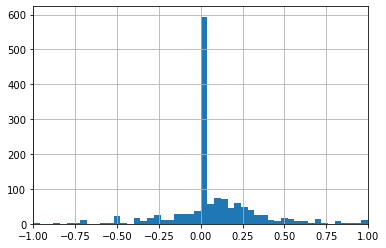

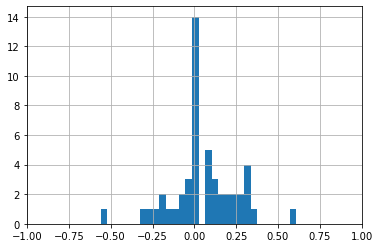

0.0
0.0


In [349]:
df_fr['sentiment'].hist(bins=50)
plt.xlim(-1, 1)
plt.show()
df_karate['sentiment'].hist(bins=30)
plt.xlim(-1, 1)
plt.show()
print(df_fr['sentiment'].median())
print(df_karate['sentiment'].median())

##### Distibutions doesn't seems so differents. But seeing empirically the sentiment classification results, one should retry the experiment with a better classifier.

### Word cloud

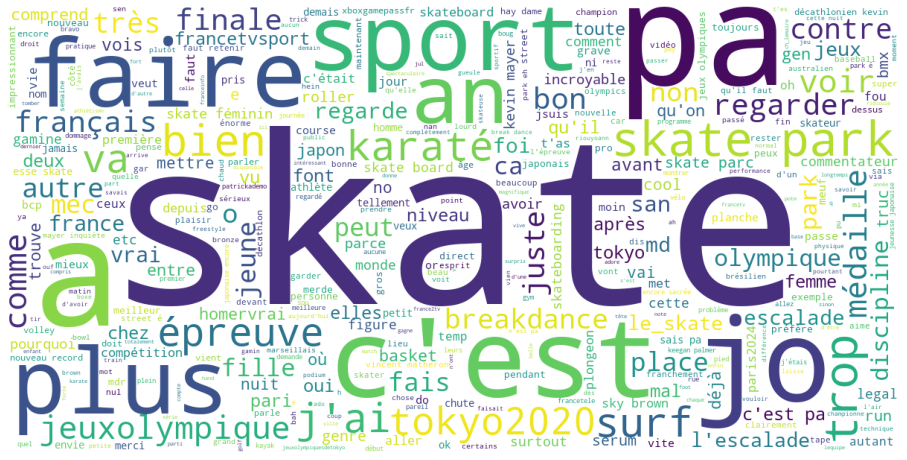

In [350]:
from wordcloud import WordCloud
from textblob import TextBlob
from tqdm import tqdm
import numpy as np

import json


wc = WordCloud(background_color='white', stopwords= final_stopwords_list, max_words = 400, width = 1200, height=600, margin=2)

txt = ""
for t in df_fr.full_text:
    txt += t
sentences = TextBlob(txt)
words = sentences.words.lower().lemmatize()
text = ' '.join(words)

plt.figure(figsize=(16, 9))
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()